### Score: `[32]`

Q1. `[11]` good job。

Q2. `[21]` good job。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [4]:
df = pd.read_csv('usgs_earthquakes.csv')

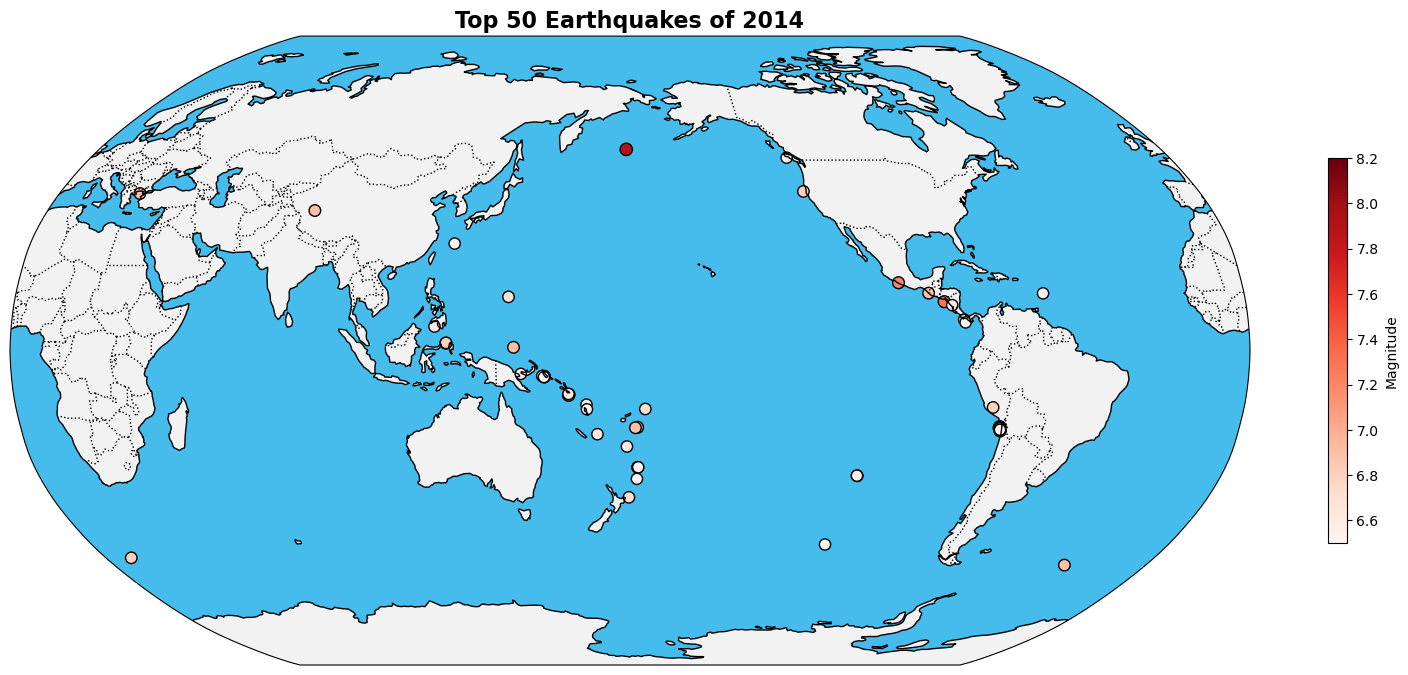

In [5]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})
# 设置地图的范围
ax.set_global()
# 添加海岸线、国家边界、陆地和海洋
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='#f2f2f2')
ax.add_feature(cfeature.OCEAN, facecolor='#46bcec')
#筛选前50的地震
top_50_earthquakes = df.nlargest(50, 'mag')
scatter = ax.scatter(
    top_50_earthquakes['longitude'], top_50_earthquakes['latitude'], 
    c=top_50_earthquakes['mag'], s=(top_50_earthquakes['mag'] * 10),  # 震级乘以10来调整点的大小
    cmap='Reds', edgecolor='k',  # 使用Reds颜色映射，并设置边缘颜色为黑色
    transform=ccrs.PlateCarree()
)
# 添加颜色条
cbar = plt.colorbar(scatter, shrink=0.5, orientation='vertical')
cbar.set_label('Magnitude')

ax.set_title('Top 50 Earthquakes of 2014', fontsize=16, fontweight='bold')
plt.show()

In [6]:
#采用PS3使用的数据先对数据进行合并
import xarray as xr
import glob
file_list = glob.glob('D:\\gitkraken\\oco2_GEOS_L3CO2_month_*.nc4')
DATA= xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
DATA

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

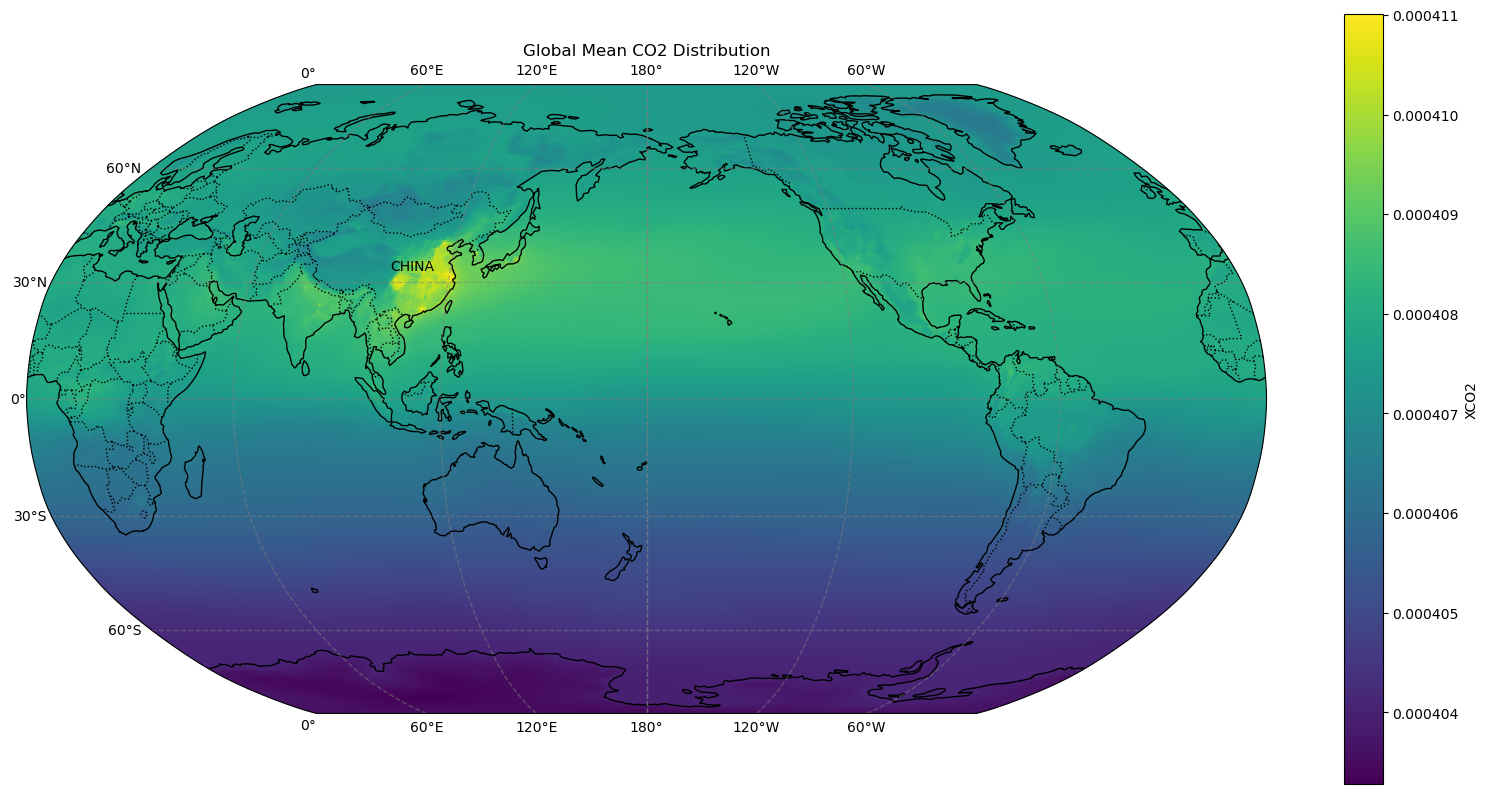

In [7]:
#因为数据集还有时间维度在我们绘制地图是不必要的我们在时间维度上给他做一个平均并绘制地图
mean_xco2 = DATA['XCO2'].mean(dim='time')
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})
ax.set_global() 
# 添加海岸线、国家边界、陆地和海洋
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='#f2f2f2')
ax.add_feature(cfeature.OCEAN, facecolor='#46bcec') 
mean_xco2.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=True)
# 添加网格线并标注经度和纬度
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
#标注中国
plt.text(108,34,'CHINA', transform=ccrs.PlateCarree(), fontsize=10, ha='center', va='center')
plt.title('Global Mean CO2 Distribution')
plt.show()

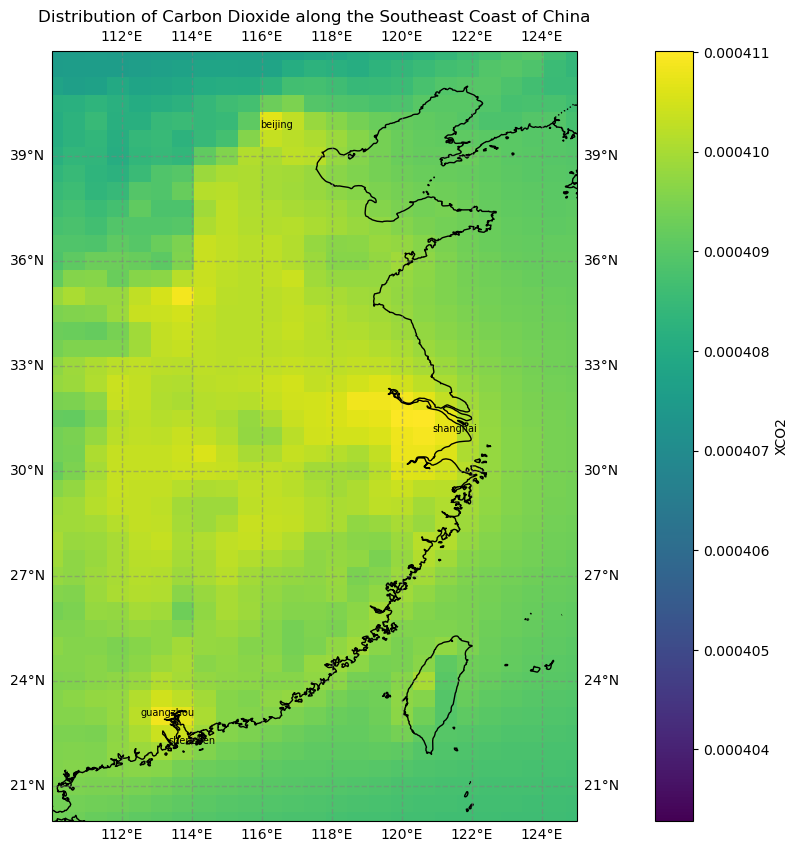

In [14]:
#我们通过上图可以看到中国东南沿海地区的二氧化碳含量较高我们重点看一下
mean_xco2 = DATA['XCO2'].mean(dim='time')
#换一个投影
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
ax.set_extent([110, 125, 20, 42], crs=ccrs.PlateCarree())
# 添加海岸线、国家边界、陆地和海洋
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='#f2f2f2')
ax.add_feature(cfeature.OCEAN, facecolor='#46bcec') 
mean_xco2.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=True)
# 添加网格线并标注经度和纬度
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
#标注中国
plt.text(116.4,39.9,'beijing', transform=ccrs.PlateCarree(), fontsize=7, ha='center', va='center')
plt.text(121.5,31.2,'shanghai', transform=ccrs.PlateCarree(), fontsize=7, ha='center', va='center')
plt.text(114,22.3,'shenzhen', transform=ccrs.PlateCarree(), fontsize=7, ha='center', va='center')
plt.text(113.3,23.1,'guangzhou', transform=ccrs.PlateCarree(), fontsize=7, ha='center', va='center')
plt.title('Distribution of Carbon Dioxide along the Southeast Coast of China')
plt.show()
#图中标注了北上广深四个超大城市从图中可以看出北上广深分布的二氧化碳浓度都比较高